<a href="https://colab.research.google.com/github/DS3001/group2/blob/main/DS3001_Group_2_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# DS 3001: Project 2 - Stroke
**Group 2: Elaine Zhang, Eric Nguyen, Cheryl Bai, Hieu Vu, Adam Chow, **
  - zzb2rf, wvu9cs, brr2tu, , ryp6vw

  - Any questions or comments about this report should be directed to the authors.



---
## Import Statements

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


---
## Data Cleaning:
  - In this section, we perform data cleaning techniques to make the dataset acceptable for data manipulation. Techniques included loading the provided dataset into the notebook, defining the variables, testing missing and NAN values, dropping columns, and making categorical variables. These techniques set the foundation for further sections and is imperative to conduct properly.

Variable Definitions:
- **age**: Patient age, numeric
- **avg_glucose_level**: Blood sugar levels, numeric
- **bmi**: Body mass index, numeric
- **ever_married**: Ever married, dummy/character (Yes, No)
- **gender**: Male, Female, or Other, character
- **heart_disease**: Has heart disease, dummy
- **hypertension**: Has hypertension, dummy
- **id**: Study identification number
- **Residence_type**: Type of residence, dummy/character (Urban, Rural)
- **smoking_status**: Former, never, or current smoker, categorical
- **work_type**: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (Private), Self-employed (Self-employed)
- **stroke**: Suffered a stroke in the sample period

In [ ]:
! git clone https://github.com/ds3001/group2

Cloning into 'group2'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 278 (delta 62), reused 92 (delta 25), pack-reused 92
Receiving objects: 100% (278/278), 39.20 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [ ]:
# Read in both the training and the testing dataset
training_data = pd.read_csv('/content/group2/project_2/data/training_data.csv')
testing_data = pd.read_csv('/content/group2/project_2/data/testing_data.csv')
training_data.columns

Index(['Unnamed: 0', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# Assess the shape and size of Training and Testing Data
print('Training size', training_data.shape)
print('Testing size', testing_data.shape)

Training size (4087, 13)
Testing size (1023, 13)


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4087 non-null   int64  
 1   id                 4087 non-null   int64  
 2   gender             4087 non-null   object 
 3   age                4087 non-null   float64
 4   hypertension       4087 non-null   int64  
 5   heart_disease      4087 non-null   int64  
 6   ever_married       4087 non-null   object 
 7   work_type          4087 non-null   object 
 8   Residence_type     4087 non-null   object 
 9   avg_glucose_level  4087 non-null   float64
 10  bmi                3928 non-null   float64
 11  smoking_status     4087 non-null   object 
 12  stroke             4087 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 415.2+ KB


In [ ]:
# Checking for missing values
print("Training NaN --")

# Calculate the sum of NaN values for each column in the testing data
nan_details = training_data.isnull().sum()
for column, value in nan_details.items(): # Iterate through each column and NaN count
  if (value != 0):
    print(column, value)

print("Testing NaN --")

# Calculate the sum of NaN values for each column in the testing data
nan_details = testing_data.isnull().sum()
for column, value in nan_details.items(): # Iterate through each column and NaN count
  if (value != 0):
    print(column, value)

Training NaN --
bmi 159
Testing NaN --
bmi 42


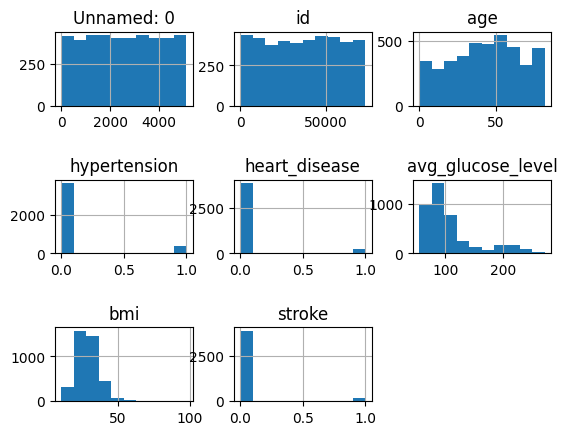

In [ ]:
# looking at the spread
training_data.hist()
plt.subplots_adjust(hspace=1) # Adjust vertical spacing between subplots
plt.show()

In [ ]:
# Drop Unamed: 0 because don't know what that column is
# Drop id, because the id of the person should have no impact on the model
training_data = training_data.drop(columns=['Unnamed: 0', 'id'])
testing_data = testing_data.drop(columns=['Unnamed: 0', 'id'])

In [ ]:
# Make hypertension, stroke, heart_disease categorical because they are binary labels
binary_columns = ['hypertension', 'heart_disease', 'stroke']
training_data[binary_columns] = training_data[binary_columns].astype('object')
testing_data[binary_columns] = testing_data[binary_columns].astype('object')

### Cleaning Summary

First, we used .columns and .shape to ensure that we have imported the data into Colab correctly. We want to continue to see that the imported data has each column that should be included in the research question". One observation that we noticed in the shapes of the dataframes was that the training data was around 4 times the size of T. This larger training dataset will help us allow our models to learn diverse patterns and enhance generalization,creating a comprehensive representation of the data distribution.

Next, we used .info in order to see the array of variables with their number of non-null values and D-type. This step was particularly useful because we were able to see that the only column in the training data that did not have any null vlaues was the bmi variable.

Because our training dataset included null values, we created an if statement within a for loop to detect the number of observations that contain null values for both the training and the testing data.

After that, taking a look at the histogram allows us to understand that avg_glucose_level is a heavily skewed right distribution. Bmi is a fairly normal distribution, centered around ~25. Finally, Age is fairly spread out without containing a specific distribution.

In addition to the histogram, we decided that it would make the most sense to drop two columns from our dataframes ("Unnamed: 0", and "id"). We removedboth of these columns because they will not have any particular importance or effect on our predicitve models.

Lastly, our .info statement told us that columns hypertension, stroke, heart_disease, all registered as int64 data types even though these varaibles should be categorical because they serve as dummy variables representing Yes/No values.

## Data Visualization
  - To effectively understand the data, we've performed several data visualizations that highlight different aspects of the training data. Initial charts include data exploration and latter graphs will provide complex relationships between variables. Creating data visualizations is an important aspect of any project as it helps make the data accessible and understandable for the wider audience. Any questions regarding these charts should be directed to the authors.

####Correlation Heatmap between levels of variables:

Reveals that homemakers lightly correlate with unknown smoking status and unmarried status. Age slightly correlates with marriage. Other than those two observations, there are no notable correlations between levels of different variables. Overall, theis heatmap did not provide us with any noteable insight on what factors might be useful in predicting hte likelihood of a stroke.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One hot encode the categorical variables to view them in the correlation matrix
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Fit and transform categorical columns, convert OneHotEncoder to DataFrame
one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(training_data[categorical_columns]).toarray()

# Create a DataFrame with one-hot encoded data
encoded_columns = one_hot_encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Drop original categorical columns
training_data_encoded = training_data.drop(columns=categorical_columns)
# Concatenate one-hot encoded DataFrame
training_data_encoded = pd.concat([training_data_encoded, encoded_df], axis=1)

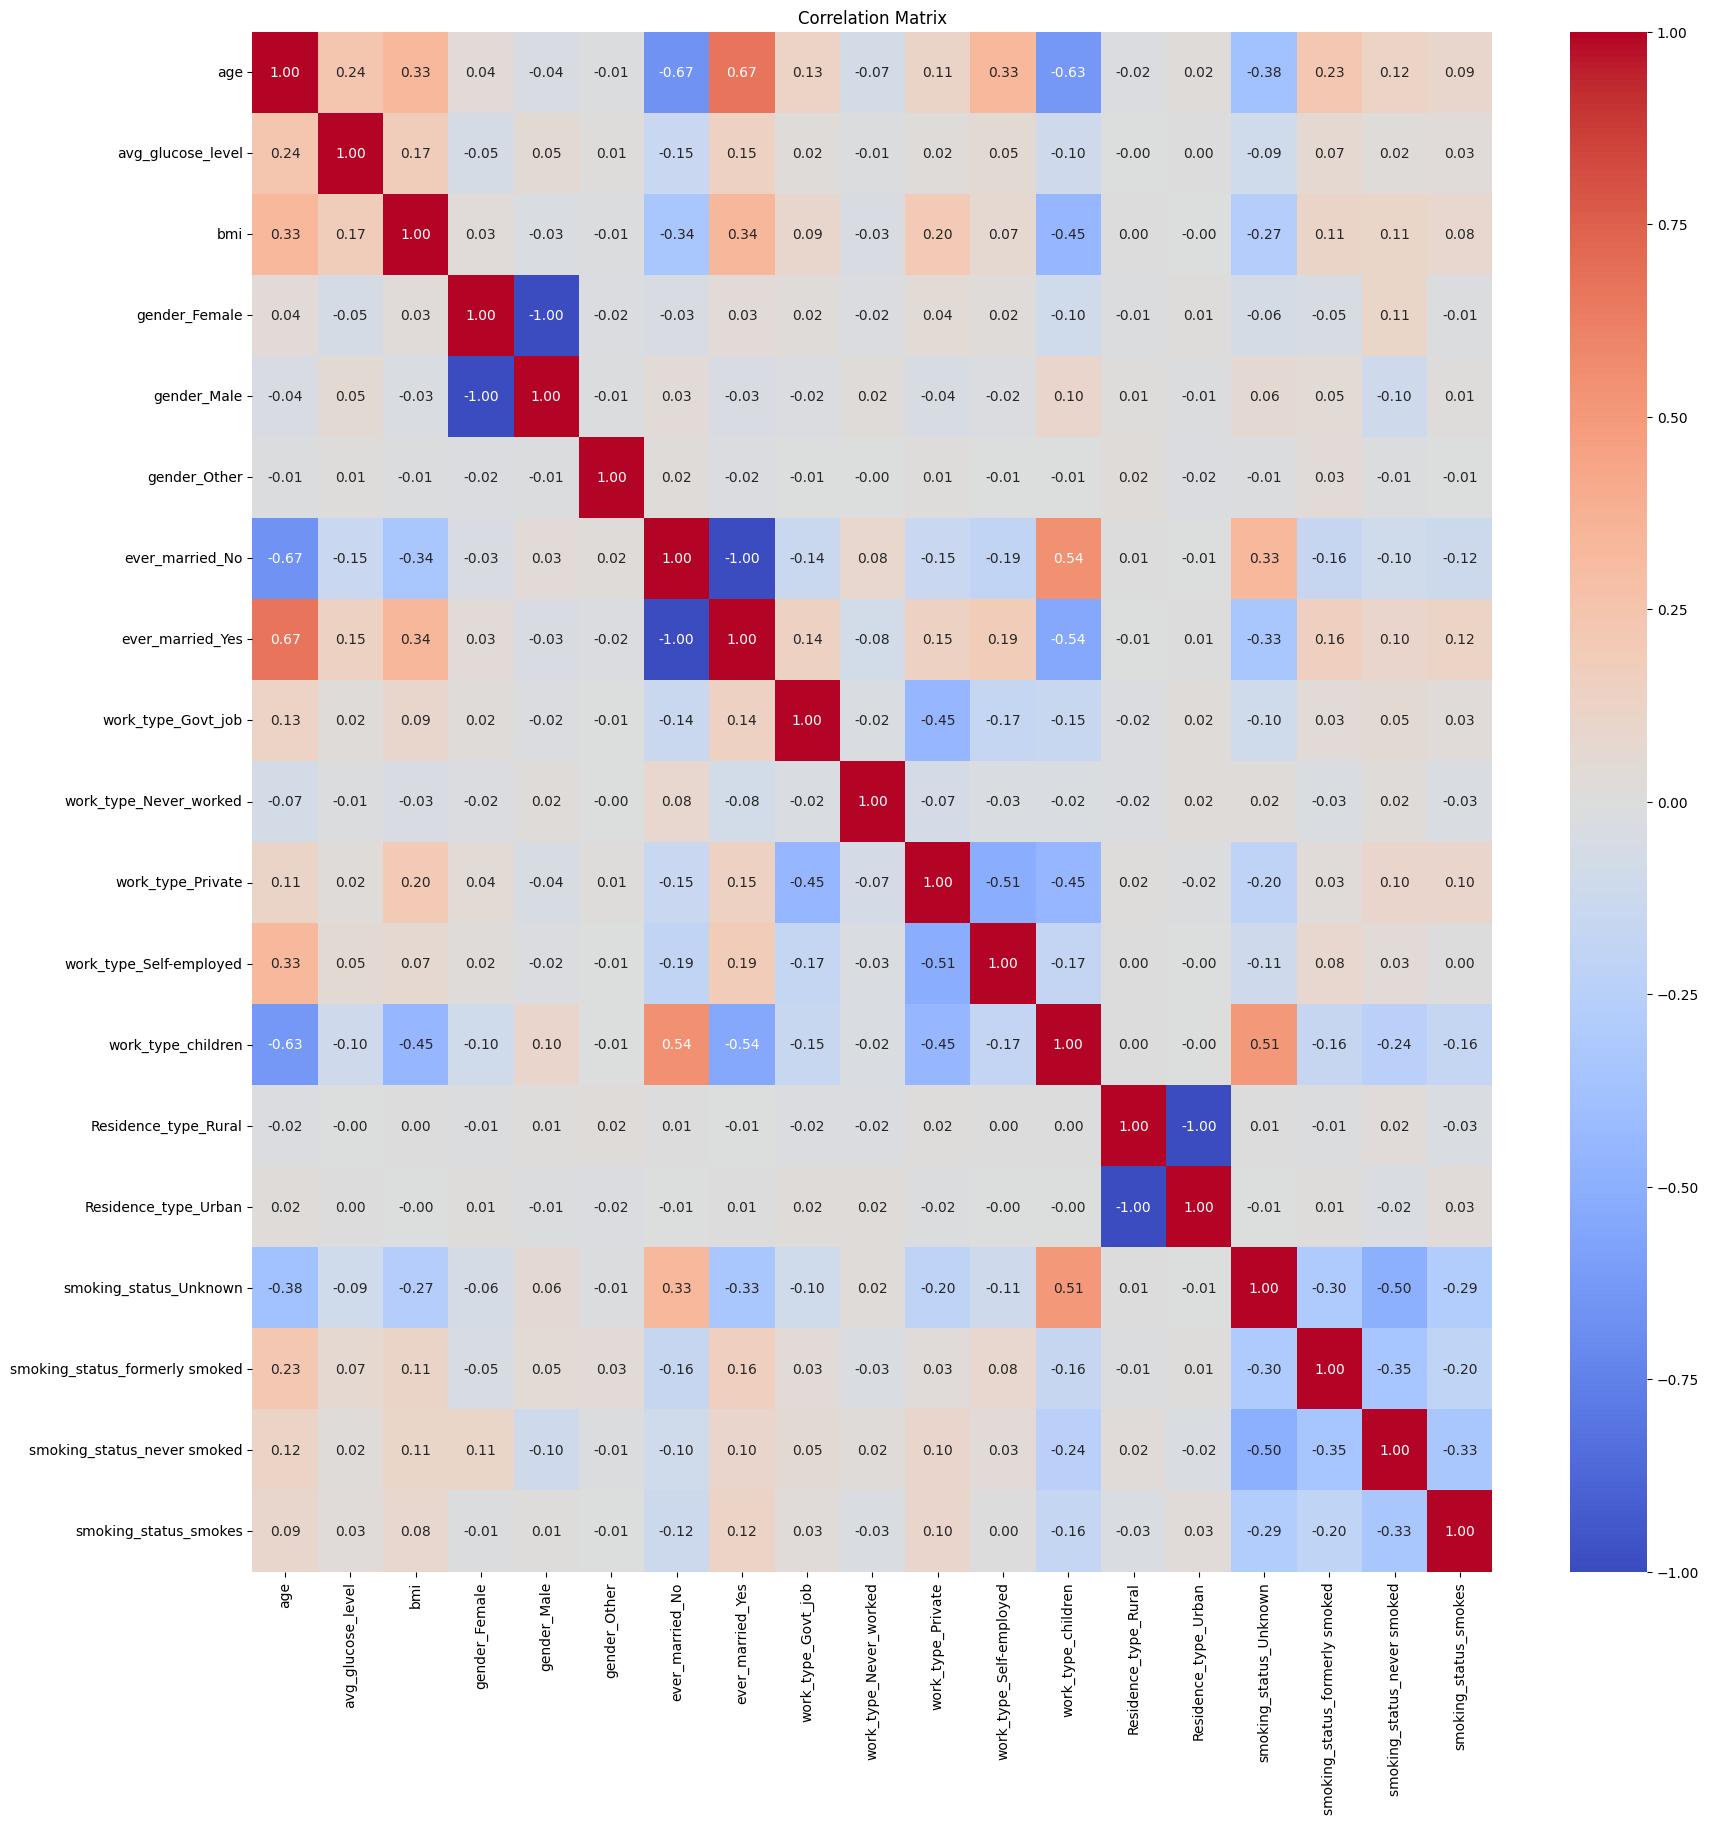

In [ ]:
import plotly.express as px

# Visualize the correlation matrix using a heatmap
correlation_matrix_encoded = training_data_encoded.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

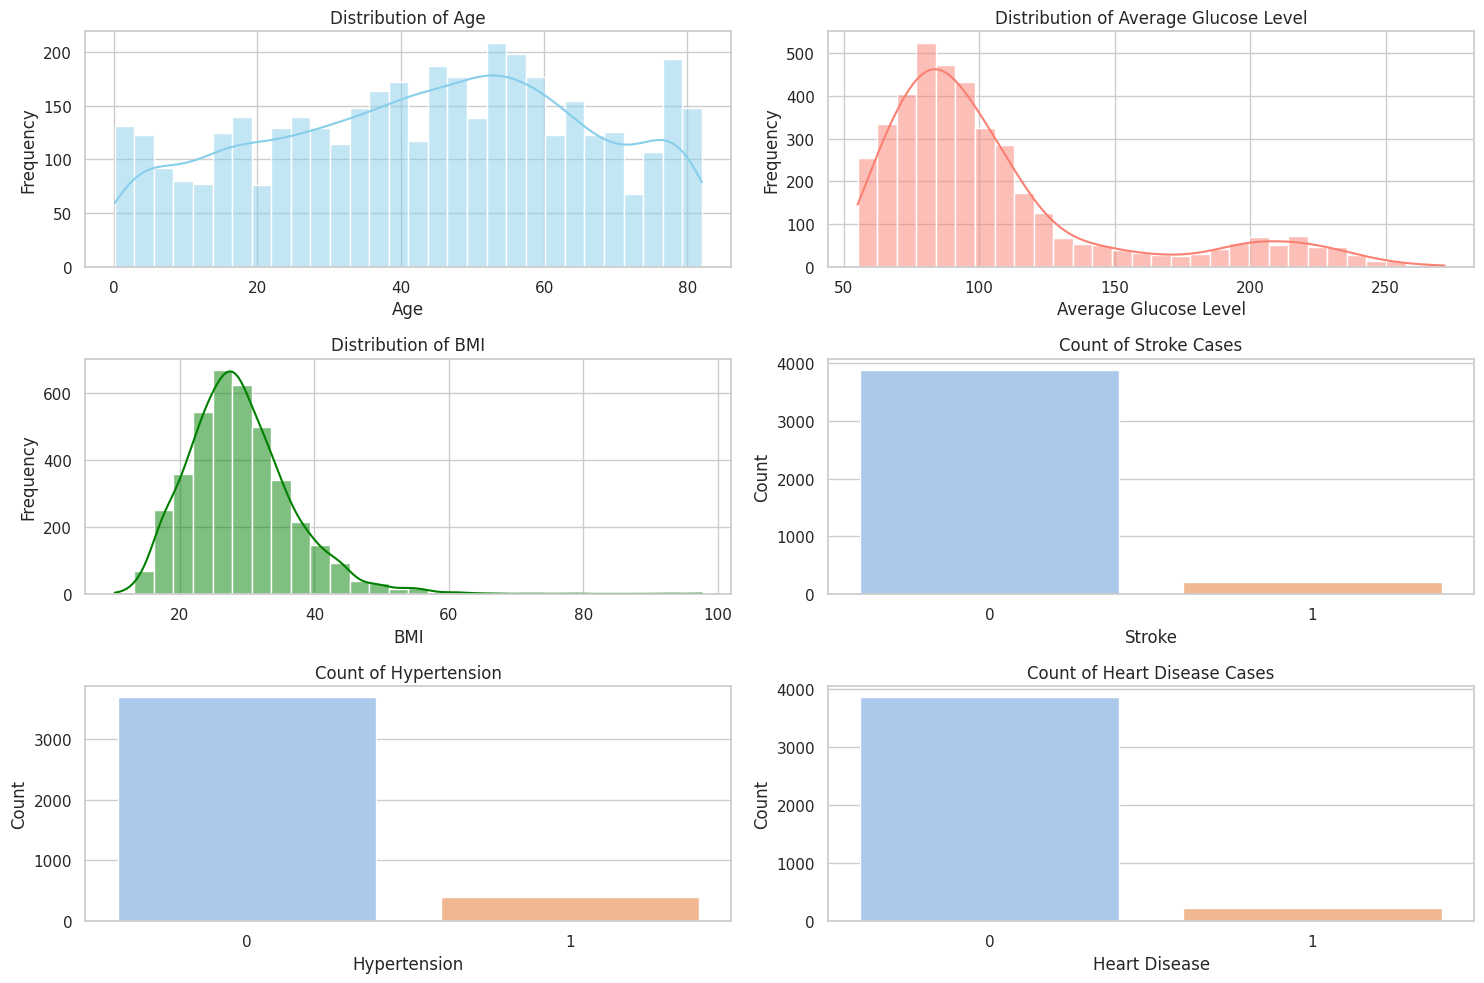

In [ ]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Age Histogram
sns.histplot(training_data['age'], bins=30, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Average Glucose Levels Histogram
sns.histplot(training_data['avg_glucose_level'], bins=30, kde=True, color='salmon', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Average Glucose Level')
axs[0, 1].set_xlabel('Average Glucose Level')
axs[0, 1].set_ylabel('Frequency')

# BMI Histogram
sns.histplot(training_data['bmi'].dropna(), bins=30, kde=True, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of BMI')
axs[1, 0].set_xlabel('BMI')
axs[1, 0].set_ylabel('Frequency')

# Count of strokes
sns.countplot(x='stroke', data=training_data, palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title('Count of Stroke Cases')
axs[1, 1].set_xlabel('Stroke')
axs[1, 1].set_ylabel('Count')

# Count of strokes
sns.countplot(x='hypertension', data=training_data, palette='pastel', ax=axs[2, 0])
axs[2, 0].set_title('Count of Hypertension')
axs[2, 0].set_xlabel('Hypertension')
axs[2, 0].set_ylabel('Count')

# Count of strokes
sns.countplot(x='heart_disease', data=training_data, palette='pastel', ax=axs[2, 1])
axs[2, 1].set_title('Count of Heart Disease Cases')
axs[2, 1].set_xlabel('Heart Disease')
axs[2, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

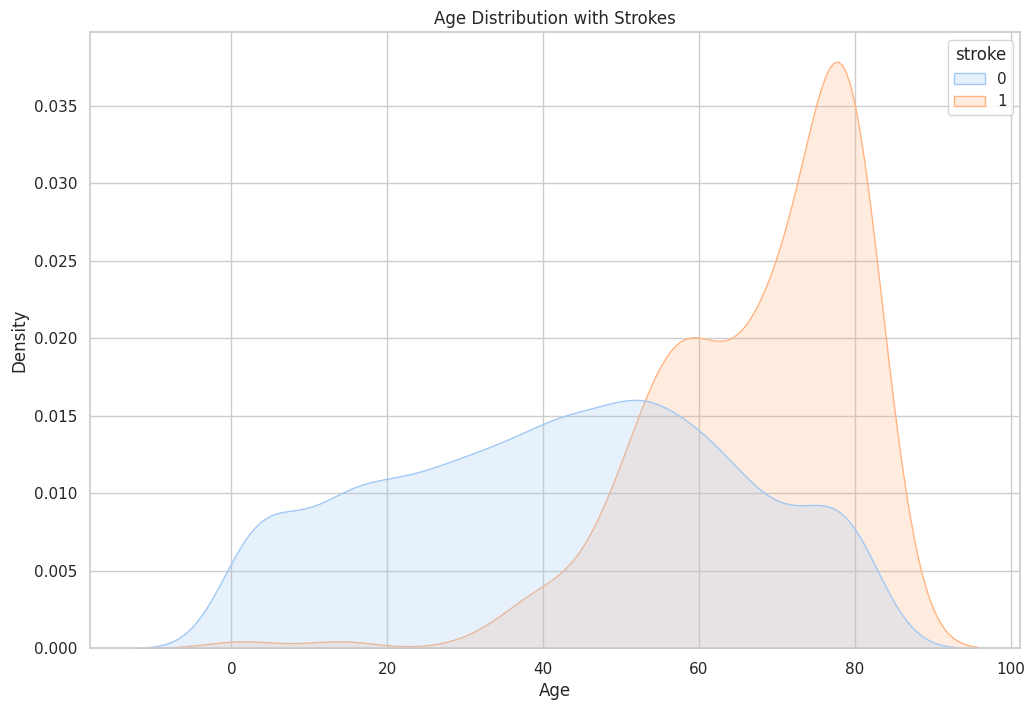

In [ ]:
# Age distribution with strokes
plt.figure(figsize=(12, 8))
sns.kdeplot(data=training_data, x='age', hue='stroke', common_norm=False, fill=True, palette='pastel')
plt.title('Age Distribution with Strokes')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

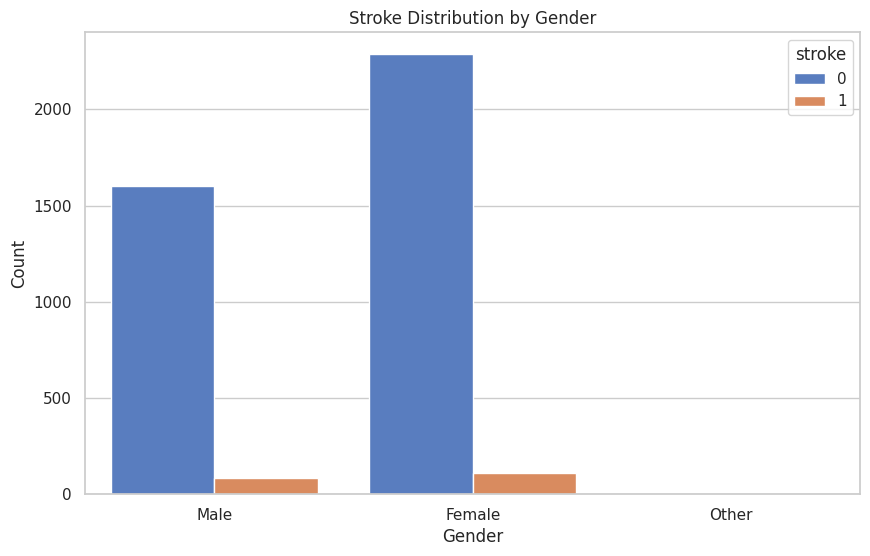

In [ ]:
# Visualize the distribution of stroke by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=training_data, hue='stroke', palette='muted')
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Interactive scatter plot for age vs. glucose level with stroke as color
fig = px.scatter(training_data, x='age', y='avg_glucose_level', color='stroke',
                 labels={'avg_glucose_level': 'Average Glucose Level'},
                 title='Scatter Plot of Age vs. Average Glucose Level with Stroke Color')
fig.show()

In [ ]:
# Interactive bar plot for work type and stroke count
work_type_stroke_count = training_data.groupby(['work_type', 'stroke']).size().reset_index(name='count')
fig = px.bar(work_type_stroke_count, x='work_type', y='count', color='stroke',
             labels={'count': 'Count', 'work_type': 'Work Type'},
             title='Bar Plot of Stroke Count by Work Type')
fig.show()

In [ ]:
# Relationship between BMI and average glucose level with stroke as color
fig = px.scatter(training_data, x='bmi', y='avg_glucose_level', color='stroke',
                 labels={'avg_glucose_level': 'Average Glucose Level'},
                 title='Scatter Plot of BMI vs. Average Glucose Level with Stroke Color')
fig.show()

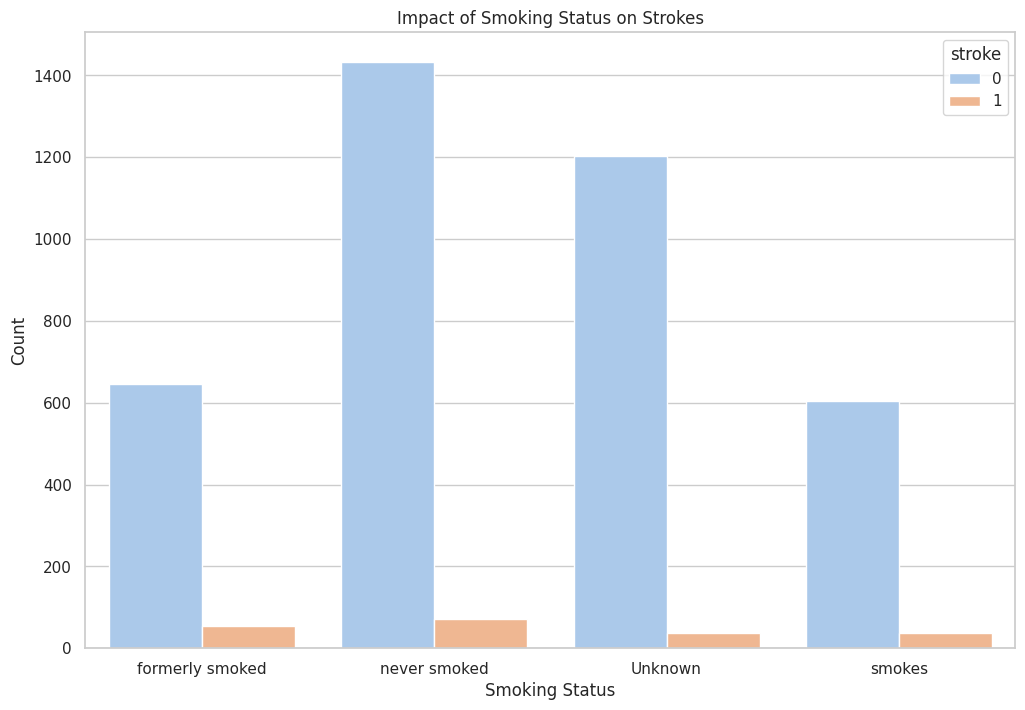

In [ ]:
# Smoking Status and Stroke
plt.figure(figsize=(12, 8))
sns.countplot(x='smoking_status', hue='stroke', data=training_data, palette='pastel')
plt.title('Impact of Smoking Status on Strokes')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

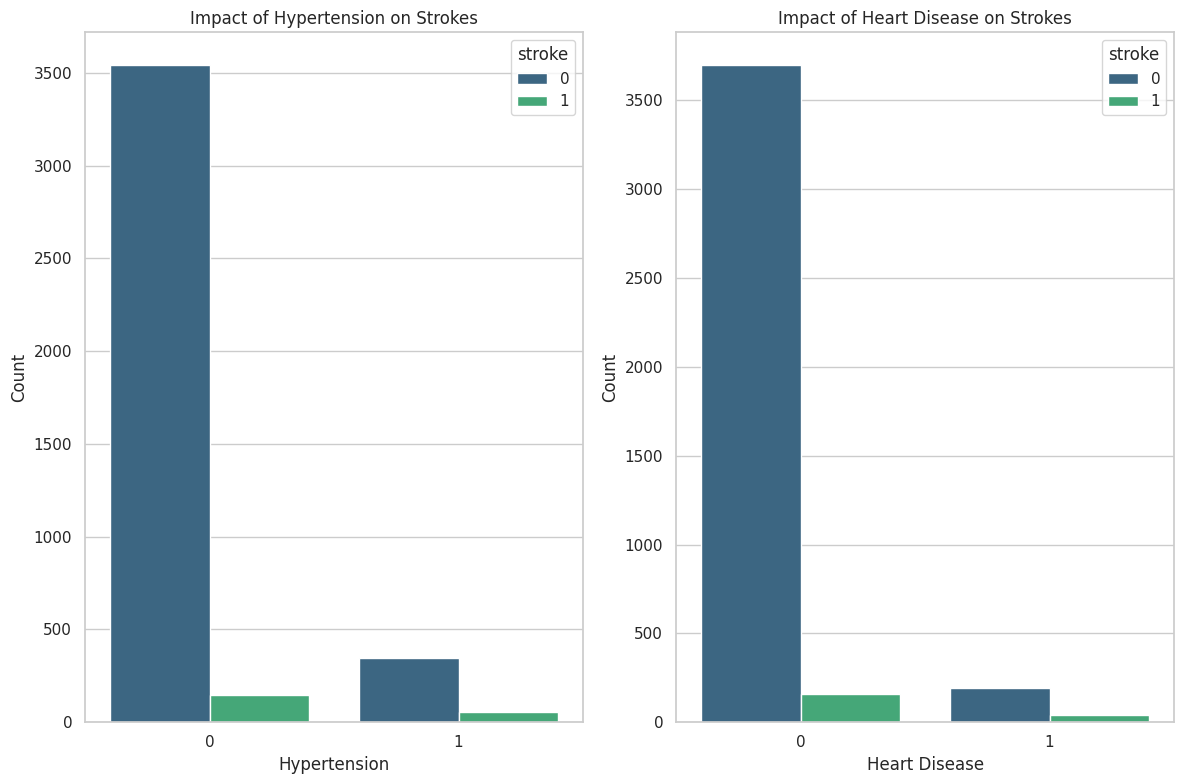

In [ ]:
# Looking at the impact of hypertension and heart disease on stroke counts
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Hypertension vs Stroke
sns.countplot(x='hypertension', hue='stroke', data=training_data, palette='viridis', ax=axs[0])
axs[0].set_title('Impact of Hypertension on Strokes')
axs[0].set_xlabel('Hypertension')
axs[0].set_ylabel('Count')

# Heart Disease vs Stroke
sns.countplot(x='heart_disease', hue='stroke', data=training_data, palette='viridis', ax=axs[1])
axs[1].set_title('Impact of Heart Disease on Strokes')
axs[1].set_xlabel('Heart Disease')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Gender and Average Glucose Level
fig = px.box(training_data, x='gender', y='avg_glucose_level', color='gender',
             labels={'avg_glucose_level': 'Average Glucose Level'},
             title='Box Plot of Average Glucose Level by Gender')
fig.show()

In [ ]:
# Age and Smoking Status
import plotly.graph_objects as go
fig = go.Figure()

for status in training_data['smoking_status'].unique():
    subset = training_data[training_data['smoking_status'] == status]
    fig.add_trace(go.Box(x=subset['smoking_status'], y=subset['age'], name=status))

fig.update_layout(title='Box Plot of Age by Smoking Status',
                  xaxis_title='Smoking Status',
                  yaxis_title='Age')
fig.show()

---
## Models
  - To effectively model the data, we have utilized several machine learning models in order to build and test our models. We used the k-nearest neighbor, linear, and decision tree models in order to experiment with multiple hyperparameters and iterate on model designs. Any questions regarding these charts should be directed to the authors.

In [ ]:
# split data into features and the target labels
X_train = training_data.drop(columns=['stroke'])
y_train = training_data["stroke"].copy()

X_test = testing_data.drop(columns=['stroke'])
y_test = testing_data["stroke"].copy()

In [ ]:
training_num = X_train.select_dtypes(include=[np.number])
training_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(training_num)
cat_attribs = list(training_cat)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler()),

])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
print(X_test_prepared)

[[ 0.65144086 -0.40074232  1.34058454 ...  0.          1.
   0.        ]
 [-1.56799352  0.10833356 -1.46837624 ...  0.          0.
   0.        ]
 [ 1.18410512 -0.82079098  0.91143776 ...  1.          0.
   0.        ]
 ...
 [ 0.60705218 -0.43759649  0.36525094 ...  0.          0.
   0.        ]
 [ 1.40604855 -0.60410626  0.05314419 ...  1.          0.
   0.        ]
 [ 1.2284938  -0.40429453 -0.10290919 ...  0.          0.
   0.        ]]


In [ ]:
# simple linear regression (no polynomial features)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_prepared, y_train)
y_pred = reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.08190438686502466
RMSE on test set: 0.2065902136167146


In [ ]:
# linear model (polynomial features degree = 2)
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2)
X_train_prepared_poly = polynomial.fit_transform(X_train_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(X_train_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.05243303156638757
RMSE on test set: 0.2098798499988756


In [ ]:
# linear model (polynomial features degree = 3)
polynomial = PolynomialFeatures(degree=3)
X_train_prepared_poly = polynomial.fit_transform(X_train_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(X_train_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: -1.9129570706652013e+17
RMSE on test set: 94301456.51079437


In [ ]:
# decision tree (depth = 1)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=1, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.06852453491795651
RMSE on test set: 0.20809013821224912


In [ ]:
# decision tree (depth = 2)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.07934294088245286
RMSE on test set: 0.20687820164821544


In [ ]:
# decision tree (depth = 3)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.07256700630007884
RMSE on test set: 0.20763810640010064


In [ ]:
# decision tree (depth = 4)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.07555497004577583
RMSE on test set: 0.20730335680004366


In [ ]:
# decision tree (depth = 5)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.017222781063939485
RMSE on test set: 0.213743702983762


In [ ]:
# knn with k = 3
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

model = kNNRegression(n_neighbors = 3)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)


R2 Score on test set: -0.2429736211031175
RMSE on test set: 0.24037912200990197
SSE:  59.11111111111107


In [ ]:
# knn with k = 5
model = kNNRegression(n_neighbors = 5)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)


R2 Score on test set: -0.11362959917780069
RMSE on test set: 0.22752869261447964
SSE:  52.959999999999994


In [ ]:
# knn with k = 10
model = kNNRegression(n_neighbors = 10)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)


R2 Score on test set: -0.014378622816032971
RMSE on test set: 0.21715299956468792
SSE:  48.239999999999995


In [ ]:
# knn with k = 1000
model = kNNRegression(n_neighbors = 1000)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)


R2 Score on test set: 0.0541752251387464
RMSE on test set: 0.20968681902383912
SSE:  44.97983899999997


In [ ]:
# trying a lot of depth values for Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]
performance_rmse = []
performance_r2 = {}

for depth in max_depth_values:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train_prepared, y_train)
    y_pred = tree_reg.predict(X_test_prepared)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    performance_rmse.append(rmse)
    performance_r2[depth] = r2

best_depth = max_depth_values[performance_rmse.index(min(performance_rmse))]
best_rmse = min(performance_rmse)
best_r2 = performance_r2[best_depth]

print(f"Best max_depth value: {best_depth}")
print(f"RMSE with best max_depth: {best_rmse}")
print(f"R2 Score with best max_depth: {best_r2}")





Best max_depth value: 2
RMSE with best max_depth: 0.20687820164821544
R2 Score with best max_depth: 0.07934294088245286


### Retrying KNN

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Read in both the training and the testing dataset
training_data = pd.read_csv('/content/group2/project_2/data/training_data.csv')
testing_data = pd.read_csv('/content/group2/project_2/data/testing_data.csv')
training_data.columns

Index(['Unnamed: 0', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# Drop Unamed: 0 because don't know what that column is
# Drop id, because the id of the person should have no impact on the model
training_data = training_data.drop(columns=['Unnamed: 0', 'id'])
testing_data = testing_data.drop(columns=['Unnamed: 0', 'id'])
print(training_data)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  36.0             0              0          Yes       Govt_job   
1     Female  45.0             0              0          Yes       Govt_job   
2       Male  58.0             0              0           No  Self-employed   
3     Female  61.0             0              0          Yes  Self-employed   
4     Female  78.0             0              0           No        Private   
...      ...   ...           ...            ...          ...            ...   
4082  Female  53.0             0              0          Yes       Govt_job   
4083    Male  76.0             1              0          Yes  Self-employed   
4084  Female  81.0             0              0          Yes        Private   
4085  Female  55.0             1              1          Yes        Private   
4086    Male  47.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [ ]:
# One-hot encode training data columns, dropping the first dummy variable
training_data = pd.get_dummies(training_data, columns=['ever_married'], drop_first=True)
training_data = pd.get_dummies(training_data, columns=['work_type'], drop_first=True)
training_data = pd.get_dummies(training_data, columns=['Residence_type'], drop_first=True)
training_data = pd.get_dummies(training_data, columns=['smoking_status'], drop_first=True)

# One-hot encode testing data columns, dropping the first dummy variable
testing_data = pd.get_dummies(testing_data, columns=['ever_married'], drop_first=True)
testing_data = pd.get_dummies(testing_data, columns=['work_type'], drop_first=True)
testing_data = pd.get_dummies(testing_data, columns=['Residence_type'], drop_first=True)
testing_data = pd.get_dummies(testing_data, columns=['smoking_status'], drop_first=True)

In [ ]:
# Select relevant variables for training data
X_train = training_data.loc[:, ['hypertension', 'heart_disease', 'stroke', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]

# Select relevant variables for testing data
X_test = testing_data.loc[:, ['hypertension', 'heart_disease', 'stroke', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]
print(X_test)

      hypertension  heart_disease  stroke  ever_married_Yes  \
0                1              0       0                 1   
1                0              0       0                 0   
2                0              0       0                 1   
3                0              0       0                 1   
4                1              0       0                 1   
...            ...            ...     ...               ...   
1018             0              0       1                 1   
1019             0              0       1                 1   
1020             0              0       1                 1   
1021             0              0       1                 1   
1022             1              0       1                 1   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                          0                  1                        0   
1                          0                  1                        0   
2              

In [ ]:
 # Model
def maxmin(x): # Max-min function
    x = (x-min(x))/(max(x)-min(x))
    return x

y_train = X_train['stroke'] # Response Variable (Training)
y_test = X_test['stroke'] # Response Variable (Testing)

X_train = X_train.apply(maxmin) # Normalize data (Training)
X_test = X_test.apply(maxmin) # Normalize data (Training)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

k_values = [1, 3, 5, 7, 9, 10, 12, 14, 16, 18, 20, 30, 50]
performance_rmse = []
performance_r2 = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    performance_rmse.append(rmse)
    performance_r2[k] = r2

best_k = k_values[performance_rmse.index(min(performance_rmse))]
best_rmse = min(performance_rmse)
best_r2 = performance_r2[best_k]

print(f"Best k value: {best_k}")
print(f"RMSE with best k: {best_rmse}")
print(f"R2 Score with best k: {best_r2}")

Best k value: 5
RMSE with best k: 0.03699356632130931
R2 Score with best k: 0.9705611510791367


### Model Summary

In the simple regrassion model, the yield is an R² of 0.0819 and an RMSE of 0.206. Then, the linear model with degree 2 polynomial features slightly decreased in performance (R² = 0.0523, RMSE = 0.2099), while degree 3 polynomial led to extremely poor results, indicating overfitting.

Next, The decision tree with a best fitted max depth of 2 resulted in a similar performance to the initial simple linear model (R² = 0.0793, RMSE = 0.2069).

Lastly, our initial runs of the KNN model produced a fitted k value around 300, also outputting a similar performance to the previous decision tree model and simple linear model. However, our best model to where the optimal k value is 5. This K value gave us our best R² = 0.9706 and RMSE = 0.037. In order to predict the likelihood of a stroke in a person, we should use this KNN model.

---




# Analysis

### Data Exploration
To begin our data exploration, we used a heatmap and found there were no significant relationships between the independent variables of the dataset.

Our first major finding was that older people were much more likely to have a stroke. Also, we found that people who have had strokes have a slightly higher bmi.

We also believe that it’s important to note the potential correlation between glucose level and stroke chance. Our data exploration created scatter plots that show strokes by glucose level plotted against both age and bmi. On each plot, there doesn’t seem to be any major relationship between glucose level and stroke as the people with strokes seem to be evenly distributed across glucose level. However, of the overall population, the majority of the subjects have lower glucose levels; therefore, since the distribution of strokes across glucose level is somewhat even, one could argue that a greater percentage of those with high glucose have strokes than those with low glucose. We believe with more data this correlation could be investigated further.

There isn’t a visibly strong correlation between smoking and strokes when directly plotted against each other. Although, due to the fact that old age is correlated with stroke likelyhood, it’s important to note that smokers and former smokers are found to be slightly older.

### Approach
Our group did well with data exploration as we investigated possible variables that could have correlations to strokes. Furthermore, we looked at inter-variable correlations to see how the relationships between variables could indirectly influence strokes.

Part of the challenge of this assignment was to use the models we learned in class (linear models, decision trees, and kNN) to reach the lowest possible RMSE. Our group tried several different hyperparameters to meet optimal results for each of the models leading to decent results.

However, if it wasn’t for the challenge of using the models listed, we would have taken a different approach. The stroke variable of the dataset is a categorical variable that contains binary values representing whether or not a subject has had a stroke. In this assignment, we used regressors; therefore, our numerical predictions were continuous and not binary. In order to match with the stroke variable and better simulate a categorical guess, we would instead use classifiers in order to create discrete predictions. This change would also allow us to report accuracy.


# Conclusion
In conclusion, our group was able to properly investigate variable correlations and train and test predictive models. We found that age and bmi had a positive correlation with strokes. Also, since smoking status had a positive correlation with age, it could have an indirect effect on strokes. Last, we believe that the patterns in the relationship between glucose levels and stroke warrant further investigation.

After some tuning, all of our models were able to present moderately accurate results. The optimal k nearest neighbor by far performed the best, with decision trees and linear regression having similar but worse results. Although for categorization problems one would usually use a classifier, we used regressors for this assignment. The regressors are not completely invaluable for this scenario as the greater the decimal value the greater the confidence the model has in that instance that a stroke occurred.

With more time, our group would first further explore the correlation between glucose levels and strokes. To do this, we could explore the ratio of total subjects above a certain glucose level threshold to the number of subjects who’ve had a stroke above the same threshold. We would then compare that ratio to the same ratio but below the threshold. Also, more data could be collected to make the distribution along glucose levels more balanced to potentially yield a more clear picture.

Also, we would train and test classifier models to compare to our regressors. Classifier models would also allow us to report accuracy.
